In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full),(X_test,y_test) = mnist.load_data()

In [151]:
X_train_full.shape

(60000, 28, 28)

In [0]:
X_train_full = X_train_full/255.0
X_test = X_test/255.0

In [0]:
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

#### Model Building

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(50,activation="relu",kernel_initializer="he_normal"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(50,activation="relu",kernel_initializer="he_normal"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10,activation="softmax"))

In [155]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 50)                39250     
_________________________________________________________________
batch_normalization_20 (Batc (None, 50)                200       
_________________________________________________________________
dense_50 (Dense)             (None, 50)                2550      
_________________________________________________________________
batch_normalization_21 (Batc (None, 50)                200       
_________________________________________________________________
dense_51 (Dense)             (None, 10)                510       
Total params: 42,710
Trainable params: 42,510
Non-trainable params: 200
_______________________________________________

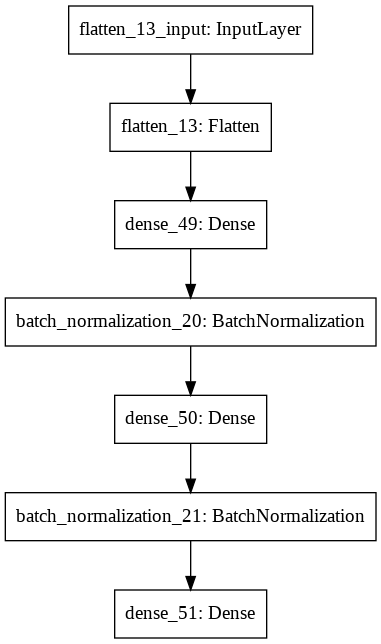

In [156]:
keras.utils.plot_model(model)

In [0]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer="Adam",
    metrics=["accuracy"]
)

In [0]:
callback_es = keras.callbacks.EarlyStopping(patience=10)

In [159]:
history = model.fit(X_train,y_train,epochs=50,validation_data=(X_valid,y_valid),callbacks=[callback_es])

Train on 55000 samples, validate on 5000 samples
Epoch 1/50
55000/55000 [==============================] - 6s 101us/sample - loss: 0.3137 - accuracy: 0.9071 - val_loss: 0.1360 - val_accuracy: 0.9612
Epoch 2/50
55000/55000 [==============================] - 5s 89us/sample - loss: 0.1609 - accuracy: 0.9509 - val_loss: 0.1085 - val_accuracy: 0.9676
Epoch 3/50
55000/55000 [==============================] - 5s 88us/sample - loss: 0.1253 - accuracy: 0.9616 - val_loss: 0.1052 - val_accuracy: 0.9682
Epoch 4/50
55000/55000 [==============================] - 5s 89us/sample - loss: 0.1056 - accuracy: 0.9663 - val_loss: 0.0928 - val_accuracy: 0.9738
Epoch 5/50
55000/55000 [==============================] - 5s 87us/sample - loss: 0.0930 - accuracy: 0.9709 - val_loss: 0.0929 - val_accuracy: 0.9748
Epoch 6/50
55000/55000 [==============================] - 5s 87us/sample - loss: 0.0823 - accuracy: 0.9740 - val_loss: 0.0877 - val_accuracy: 0.9738
Epoch 7/50
55000/55000 [==============================] 

In [160]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 0s 40us/sample - loss: 0.0950 - accuracy: 0.9754


[0.09496147882113, 0.9754]